# ADMIXTURE

## General Settings

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

# % run general_settings.py
# # ^ Takes ~20s to run if it finds the dumpfiles
# # ^ WARNING: It will hog ~2.02 Gb RAM

# % run datasets_settings.py
# # ^ Will take another ~20s

# ! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples

* En `./dataset_dumps/` están los archivos `.samples` con los sample IDs de 1000 Genomas para cada dataset (`L`, `LE`, `LEA` ...). En `../1000Genomes/galanter_beds` están los archivos (`.bed`, `.bim` ...) de PLINK de cada panel (GALs y CPs).
* Copié tanto los `.samples` como los bedfiles a `~/tesina/admixture` (con `./0_bring_the_panel_bedfiles.sh`) y corrí `1_create_datasets_run_admixture.sh panel_label_1 panel_label_2 ..`. Se crean automáticamente directorios por cada combineta de dataset + panel con los archivos `.P` y `.Q`
* Finalmente corrí `2_generate_CV_errors`.

## CV Errors

### Plot the CV errors per dataset / per panel

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from plotters.admixture_cv_errors import AdmixtureCVErrors


sns.set_context("notebook")
sns.set_style("white")

admixture_cv_errors = AdmixtureCVErrors()
cv_errors = admixture_cv_errors.read_cv_errors()

idx = pd.IndexSlice
gal_panels_cv_error = cv_errors.loc[idx[:, ["GAL_Completo", "GAL_Affy", "GAL_Faltantes"]], :]
cp_panels_cv_error = cv_errors.loc[idx[:, ["CPx1", "CPx10", "CPx100"]], :]

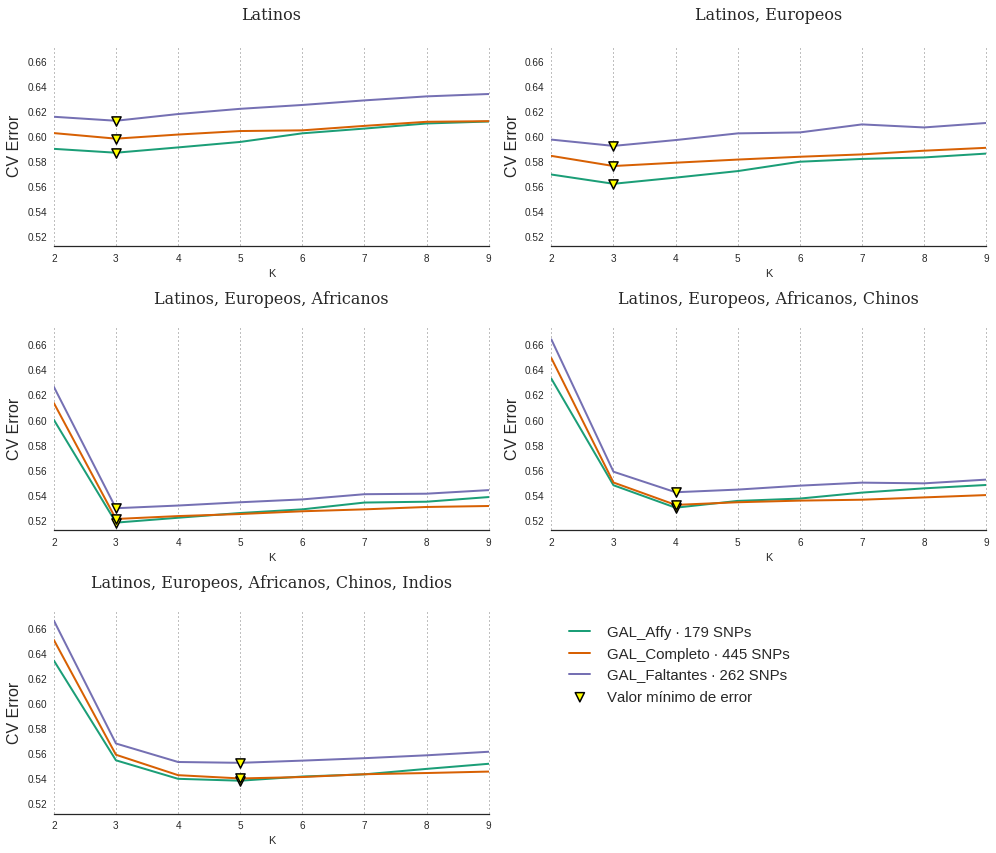

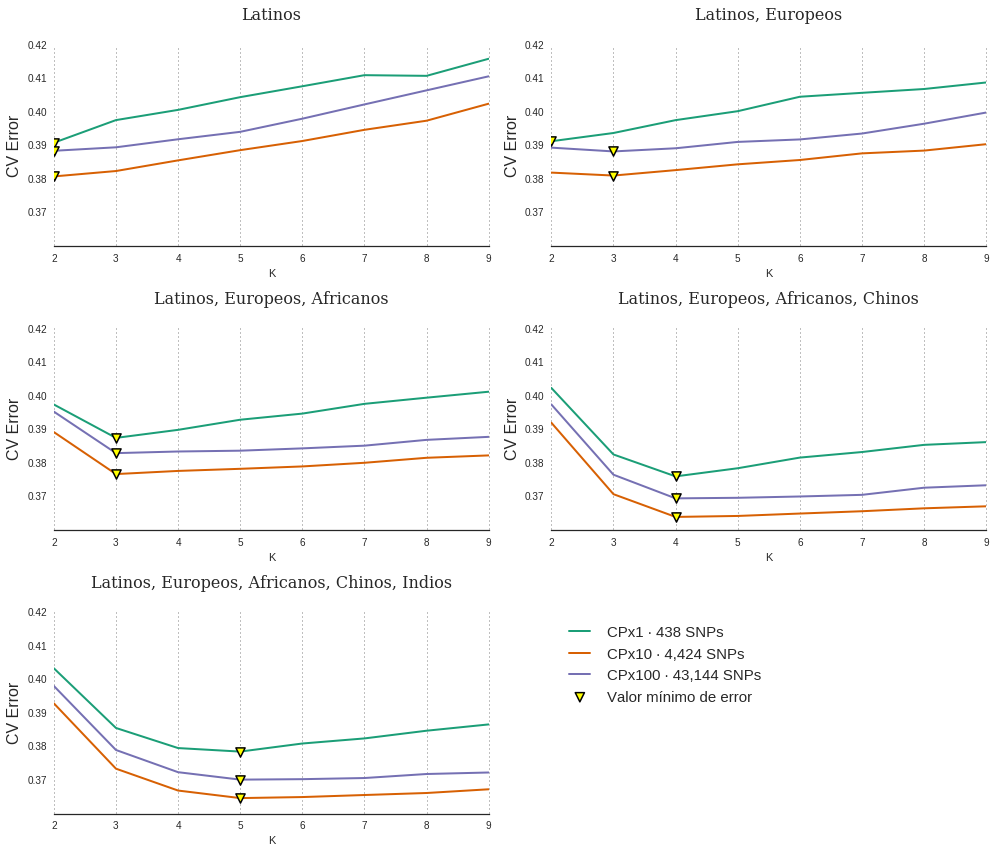

In [3]:
labels = ["CV_errors_GAL", "CV_errors_CPx"]
panel_groups = [gal_panels_cv_error, cp_panels_cv_error]

for filename, panel_group in zip(labels, panel_groups):
    ax = admixture_cv_errors.plot(filename, panel_group)
    plt.show()

## Ancestry ratios per population (mean) and per individual sample

In [3]:
%%time

from admixture.results import AdmixtureResults

admix_results = AdmixtureResults()
ancestries_df = admix_results.read_ancestry_files()

CPU times: user 15.8 s, sys: 152 ms, total: 16 s
Wall time: 16.5 s


In [27]:
%%time

import seaborn as sns
from plotters.admixture_ancestries import AdmixtureAncestries

sns.set_context("notebook", font_scale=1.5)
sns.set_style("white")

admix_plotter = AdmixtureAncestries()

# # debug or show as example
# K, p, d = 5, "CPx100", "LEACI"
# admix_plotter.plot_per_sample(d, K, p, ancestries_df)
# admix_plotter.plot_population_means(d, K, p, ancestries_df)

# Rerun this line in case you wanna replot population ancestries means:
admix_plotter.plot_all(ancestries_df)

/home/juan/repos/tesina/plotters/admixture_ancestries.py:61: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_lite = ancestries_df.loc[dataset_label, K, panel_label]
/home/juan/repos/tesina/plotters/admixture_ancestries.py:21: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_lite = ancestries_df.loc[dataset_label, K, panel_label].dropna(axis=1)


CPU times: user 1h 17min 17s, sys: 4min 23s, total: 1h 21min 40s
Wall time: 1h 16min 48s


/home/juan/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


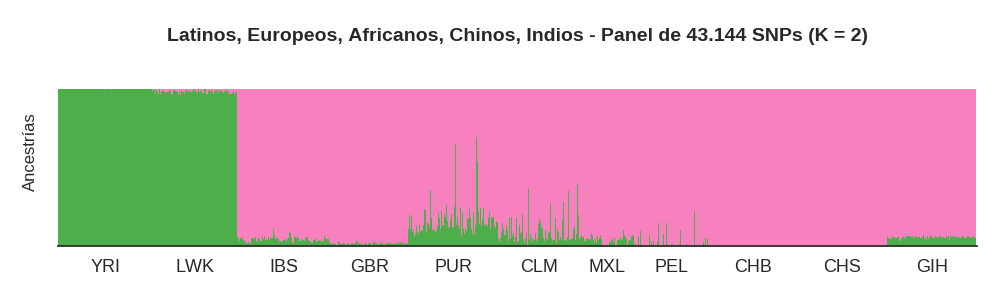

In [13]:
from IPython.display import Image
from os.path import join

panel, dataset, K = "CPx100", "LEACI", 2
filedir = "/home/juan/tesina/charts/ADMIXTURE/"
filename = "{0}__{1}/{1}__{0}__{2}".format(panel, dataset, K)

Image(join(filedir, filename + "__samples.png"))

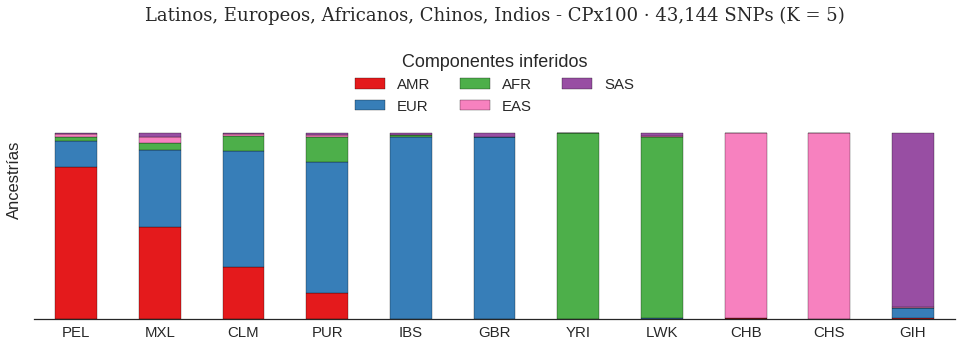

In [9]:
Image(join(filedir, filename + "__means.png"))

# Ternary plots

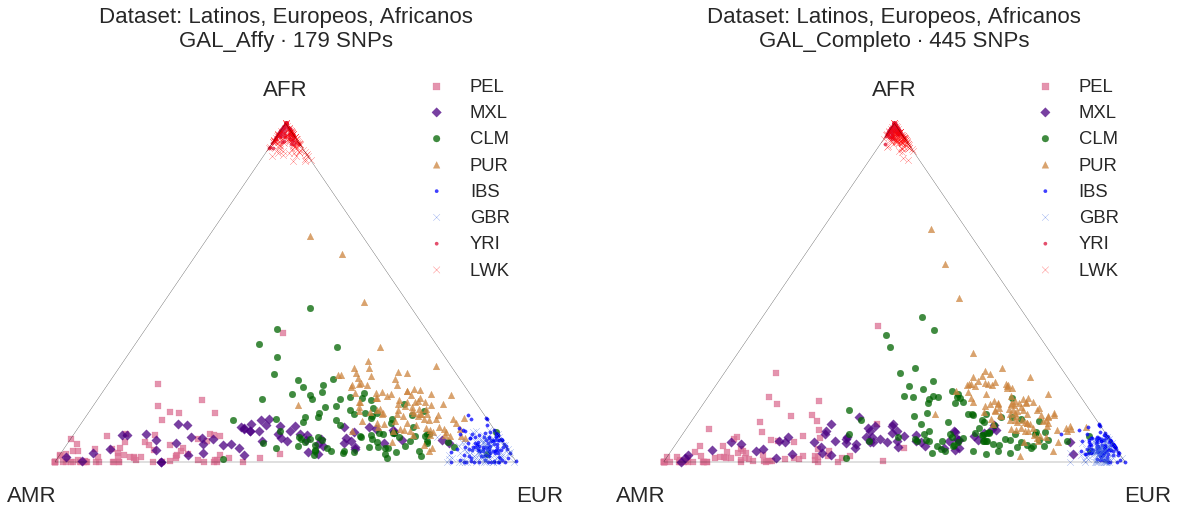

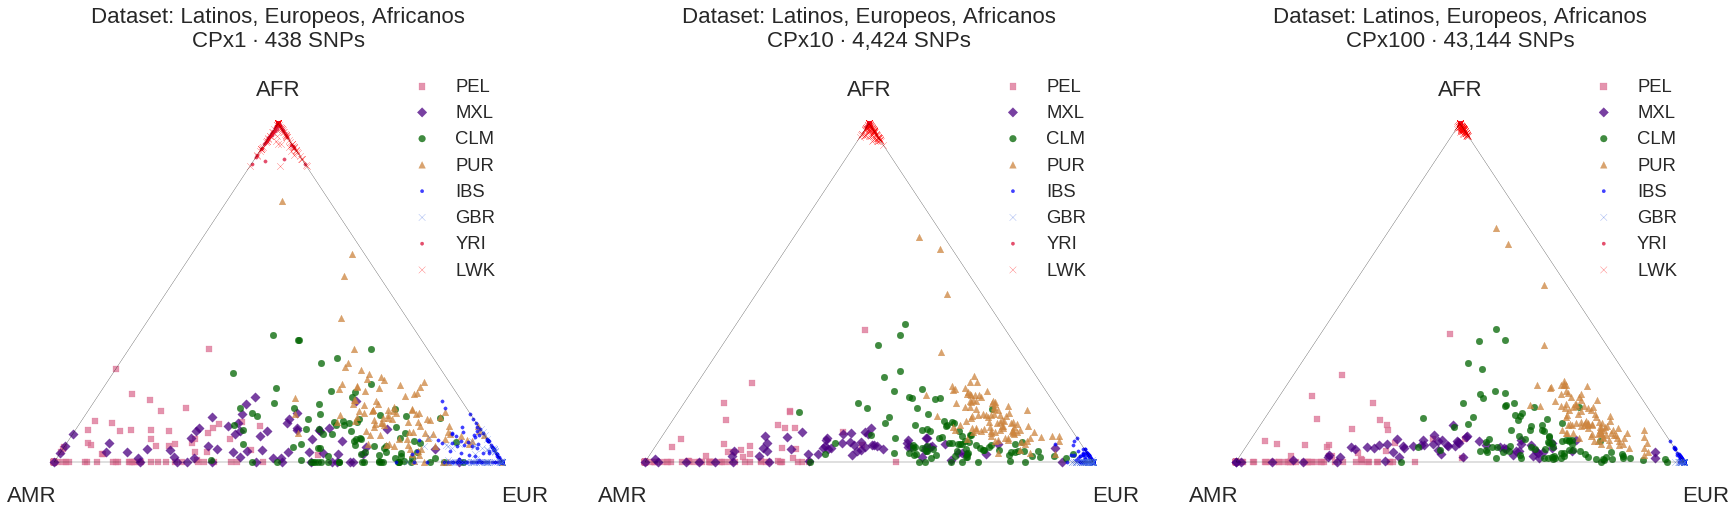

In [8]:
import pandas as pd
import seaborn as sns

from components.panel import Panel
from components.dataset import Dataset
from plotters.ancestries_triangle_plotter import AncestriesTrianglePlotter


sns.set_context("notebook", font_scale=1.85)
sns.set_style("white")


triangle_plotter = AncestriesTrianglePlotter()
idx = pd.IndexSlice
dataset = Dataset("LEA")

for panel_group_label, panel_group in Panel.panel_groups().items():
    if panel_group_label == "subpanels":
        continue
    if panel_group_label == "panels":
        panel_group = [p for p in panel_group if not "Faltantes" in p.label]

    panel_labels = [panel.label for panel in panel_group]
    
    # Choose the dataset / panels to plot
    df = ancestries_df.sort_index().loc[idx[dataset.label, 3, panel_labels], :]   
    filename = "ternary_plot_of_ancestries__{}_{}".format(dataset.label, panel_group_label)
    triangle_plotter.plot(filename, panel_group, df)